# **Mohammad Nour Alawad - Ghfran Jabour**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
import datetime

# **1. Loading CSV Files**
we uploaded the data files to google drive in order to use them in this project, So we have to retrieve the data in CSV files by going over all the files in the Dataset directory and storing them in a Dataframe:

In [5]:
mylist= os.listdir('/content/drive/MyDrive/mobile-phone-activity')
#print(mylist)

dataset = pd.DataFrame()
for i in range (0,6):
  day_data = pd.read_csv('/content/drive/MyDrive/mobile-phone-activity/' + mylist[i],parse_dates=['datetime'])
  dataset = dataset.append(day_data)
dataset.head()


,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02,2,39,1.5028,1.1243,0.2751,0.3023,46.6933


In [6]:
dataset.shape

(13197237, 8)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13197237 entries, 0 to 2407383
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   datetime     datetime64[ns]
 1   CellID       int64         
 2   countrycode  int64         
 3   smsin        float64       
 4   smsout       float64       
 5   callin       float64       
 6   callout      float64       
 7   internet     float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 906.2 MB


In [8]:
dataset.describe()

,CellID,countrycode,smsin,smsout,callin,callout,internet
count,1.319724e+07,1.319724e+07,5.217770e+06,3.077028e+06,3.625162e+06,5.629788e+06,5.915110e+06
mean,5.308763e+03,3.637739e+02,7.837552e+00,7.436874e+00,7.606378e+00,5.583692e+00,1.023036e+02
std,2.722914e+03,4.386067e+03,2.776520e+01,2.534249e+01,2.993476e+01,2.657579e+01,4.290578e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.163000e+03,3.300000e+01,1.008000e-01,9.170000e-02,5.740000e-02,5.580000e-02,5.790000e-02
50%,5.448000e+03,4.300000e+01,6.010000e-01,5.549000e-01,2.426000e-01,2.080000e-01,2.055000e-01
75%,7.544000e+03,8.600000e+01,4.696600e+00,4.449600e+00,2.228300e+00,1.025700e+00,5.522375e+00
max,1.000000e+04,9.725900e+04,2.288739e+03,2.270682e+03,1.328088e+03,1.511686e+03,3.174863e+04


# **2. Data Preprocessing**
This is a necessary step in order to have a meaningful and accurate clustring result.
the steps:

 

*   Dealing with null values.
*   Deriving meaningful columns.
*   Removing outliers.
*   Data Scaling (to gaussain distribution by a standerd Scaller).





## **2.1. Dealing with null values**
At first we have to see if we have null values, then we have to find a way to deal with these values.

And because all of the attributes represent usages, So the best way to deal with the null values is to set them to ZERO, **which will indicate that there is no use of this servise**.

In [9]:
nulls = dataset.isnull().sum()
print(nulls)

datetime              0
CellID                0
countrycode           0
smsin           7979467
smsout         10120209
callin          9572075
callout         7567449
internet        7282127
dtype: int64


In [10]:
nulls_percentage = round(100*(dataset.isnull().sum())/len(dataset),2)
print(nulls_percentage)

datetime        0.00
CellID          0.00
countrycode     0.00
smsin          60.46
smsout         76.68
callin         72.53
callout        57.34
internet       55.18
dtype: float64


**Setting the null values to ZERO.**

In [11]:
dataset = dataset.replace(np.nan, 0)

In [12]:
nulls = dataset.isnull().sum()
print(nulls)

datetime       0
CellID         0
countrycode    0
smsin          0
smsout         0
callin         0
callout        0
internet       0
dtype: int64


In [13]:
dataset.describe()

,CellID,countrycode,smsin,smsout,callin,callout,internet
count,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07
mean,5.308763e+03,3.637739e+02,3.098720e+00,1.733959e+00,2.089403e+00,2.381938e+00,4.585330e+01
std,2.722914e+03,4.386067e+03,1.787390e+01,1.263454e+01,1.605226e+01,1.757595e+01,2.917179e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.163000e+03,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.448000e+03,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.544000e+03,8.600000e+01,2.314000e-01,0.000000e+00,1.150000e-02,1.343000e-01,1.530000e-01
max,1.000000e+04,9.725900e+04,2.288739e+03,2.270682e+03,1.328088e+03,1.511686e+03,3.174863e+04


## **2.2. Adding meaningful attributes**
**Columns (Attributes) Preprocessing and adding meaningful columns, which will help us find good offers for customers.**

In [14]:
dataset['smsinout'] = dataset['smsin'] + dataset['smsout']
dataset['callinout'] = dataset['callin'] + dataset['callout']

dataset['allUsage'] = dataset['smsinout'] + dataset['callinout'] + dataset['internet']

dataset['datetime'] = pd.to_datetime(dataset['datetime'])

#getting the hour as in {0,1,...,23}
dataset['hour'] = dataset['datetime'].dt.hour

#getting the day of the week as in {0,1,...,6}  
dataset['day'] = dataset['datetime'].dt.dayofweek

In [15]:
dataset.shape

(13197237, 13)

In [16]:
dataset.describe()

,CellID,countrycode,smsin,smsout,callin,callout,internet,smsinout,callinout,allUsage,hour,day
count,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07,1.319724e+07
mean,5.308763e+03,3.637739e+02,3.098720e+00,1.733959e+00,2.089403e+00,2.381938e+00,4.585330e+01,4.832679e+00,4.471342e+00,5.515732e+01,1.313569e+01,2.626251e+00
std,2.722914e+03,4.386067e+03,1.787390e+01,1.263454e+01,1.605226e+01,1.757595e+01,2.917179e+02,2.948186e+01,3.349323e+01,3.483015e+02,5.841075e+00,2.035926e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.163000e+03,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.670000e-02,9.000000e+00,1.000000e+00
50%,5.448000e+03,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.800000e-03,2.026000e-01,1.300000e+01,2.000000e+00
75%,7.544000e+03,8.600000e+01,2.314000e-01,0.000000e+00,1.150000e-02,1.343000e-01,1.530000e-01,3.554000e-01,2.275000e-01,1.071200e+00,1.800000e+01,5.000000e+00
max,1.000000e+04,9.725900e+04,2.288739e+03,2.270682e+03,1.328088e+03,1.511686e+03,3.174863e+04,4.503561e+03,2.797349e+03,3.564692e+04,2.300000e+01,6.000000e+00


## **2.3. Dealing with outliers**
Outliers cause alot of problems in the clustring, because they will affect the shapes of the clusters in a way that makes the clustering operation non-accurate.


**Checking the distribution of each attribute by drawing the histogram for each one**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12ffb71650>]],
      dtype=object)

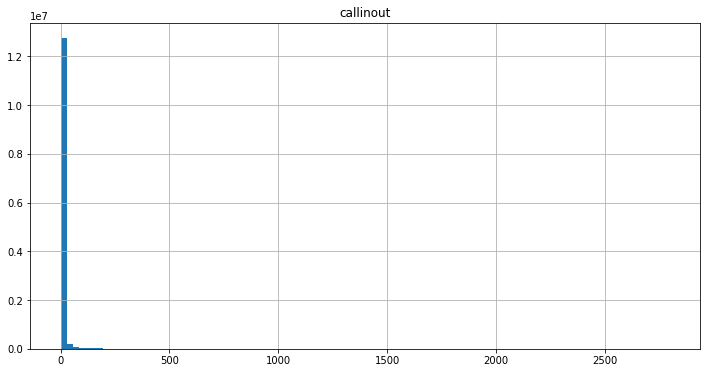

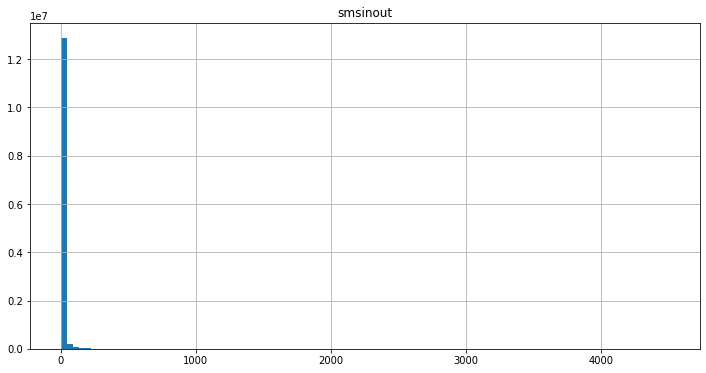

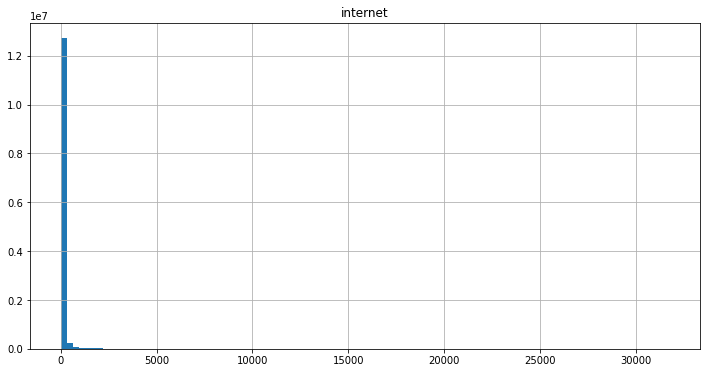

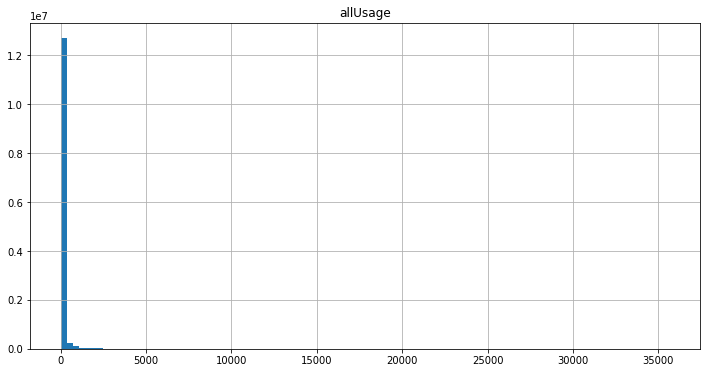

In [17]:
dataset.hist(column='callinout', bins=100, figsize=(12,6))
dataset.hist(column='smsinout', bins=100, figsize=(12,6))
dataset.hist(column='internet', bins=100, figsize=(12,6))
dataset.hist(column='allUsage', bins=100, figsize=(12,6))

**We can notice that there are some outliers in the high values, So we need to remove them, but first lets look at them:**

- **Attributes Boxplots**

Text(0.5, 0, 'Attributes')

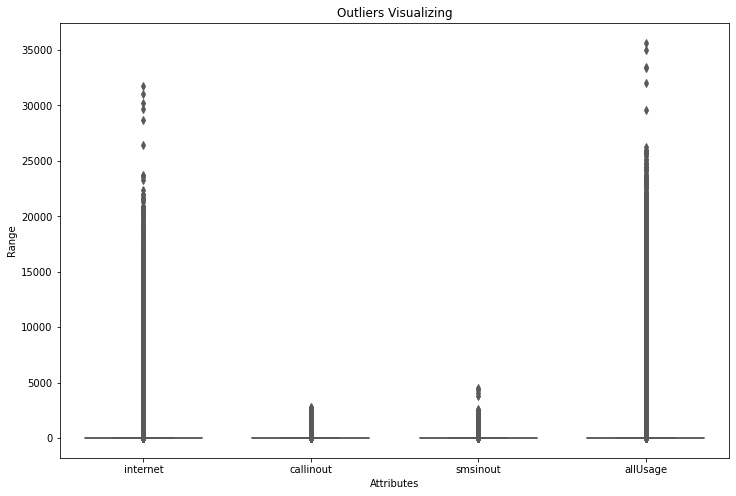

In [18]:
attributes = ['internet', 'callinout', 'smsinout', 'allUsage']
plt.rcParams['figure.figsize'] = [12, 8]
sns.boxplot(data = dataset[attributes], orient='v', palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Visualizing")
plt.ylabel("Range")
plt.xlabel("Attributes")

**One way to deal with the outliers is to use the Quantile Range, and then remove the data outside the range:**
` [ Q1-1.5*IQR , Q3+1.5*IQR ]`

In [19]:
Q1 = dataset.internet.quantile(0.25)
Q3 = dataset.internet.quantile(0.75)
IQR = Q3 - Q1

print("before deleting the internet that make an outlier: ")
print(dataset.shape)

dataset = dataset.loc[(dataset['internet'] >= Q1 - 1.5 * IQR) & (dataset['internet'] <= Q3 + 1.5 * IQR)]

print("after deleting the internet that make an outlier: ")
print(dataset.shape)

before deleting the internet that make an outlier: 
(13197237, 13)
after deleting the internet that make an outlier: 
(10829621, 13)


In [20]:
Q1 = dataset.callinout.quantile(0.25)
Q3 = dataset.callinout.quantile(0.75)
IQR = Q3 - Q1

print("before deleting the calls that make an outlier: ")
print(dataset.shape)

dataset = dataset.loc[(dataset['callinout'] >= Q1 - 1.5 * IQR) & (dataset['callinout'] <= Q3 + 1.5 * IQR)]

print("after deleting the calls that make an outlier: ")
print(dataset.shape)

before deleting the calls that make an outlier: 
(10829621, 13)
after deleting the calls that make an outlier: 
(9340849, 13)


In [21]:
Q1 = dataset.smsinout.quantile(0.25)
Q3 = dataset.smsinout.quantile(0.75)
IQR = Q3 - Q1

print("before deleting the sms that make an outlier: ")
print(dataset.shape)

dataset = dataset.loc[(dataset['smsinout'] >= Q1 - 1.5 * IQR) & (dataset['smsinout'] <= Q3 + 1.5 * IQR)]

print("after deleting the sms that make an outlier: ")
print(dataset.shape)

before deleting the sms that make an outlier: 
(9340849, 13)
after deleting the sms that make an outlier: 
(7658614, 13)


In [22]:
Q1 = dataset.allUsage.quantile(0.25)
Q3 = dataset.allUsage.quantile(0.75)
IQR = Q3 - Q1

print("before deleting the allUsage that make an outlier: ")
print(dataset.shape)

dataset = dataset.loc[(dataset['allUsage'] >= Q1 - 1.5 * IQR) & (dataset['allUsage'] <= Q3 + 1.5 * IQR)]

print("after deleting the allUsage that make an outlier: ")
print(dataset.shape)

before deleting the allUsage that make an outlier: 
(7658614, 13)
after deleting the allUsage that make an outlier: 
(7479154, 13)


In [23]:
dataset.reset_index(inplace=True)
dataset.head()

,index,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,smsinout,callinout,allUsage,hour,day
0,2,2013-11-02,1,53,0.0018,0.0036,0.0,0.0,0.0,0.0054,0.0,0.0054,0,5
1,5,2013-11-02,2,53,0.0009,0.0018,0.0,0.0,0.0,0.0027,0.0,0.0027,0,5
2,10,2013-11-02,4,53,0.0043,0.0086,0.0,0.0,0.0,0.0129,0.0,0.0129,0,5
3,13,2013-11-02,5,53,0.0049,0.0098,0.0,0.0,0.0,0.0147,0.0,0.0147,0,5
4,22,2013-11-02,10,0,0.1100,0.0000,0.0,0.0,0.0,0.1100,0.0,0.1100,0,5


**Now lets look at the attributes histograms after removing the outliers:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12ffec3690>]],
      dtype=object)

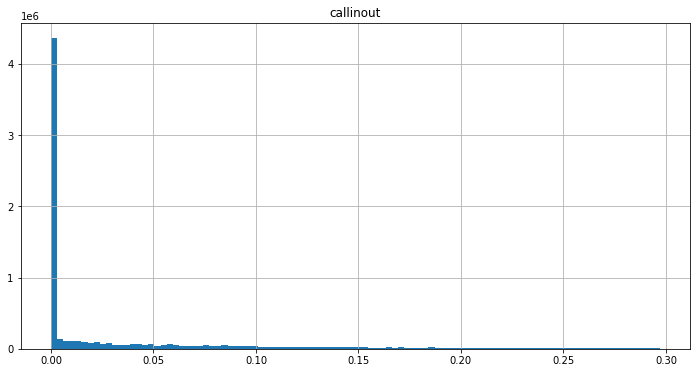

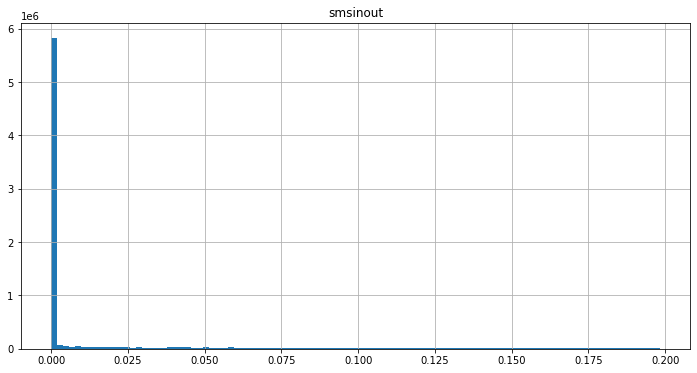

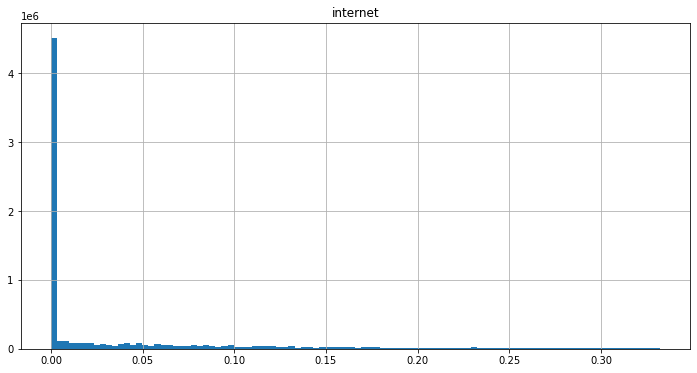

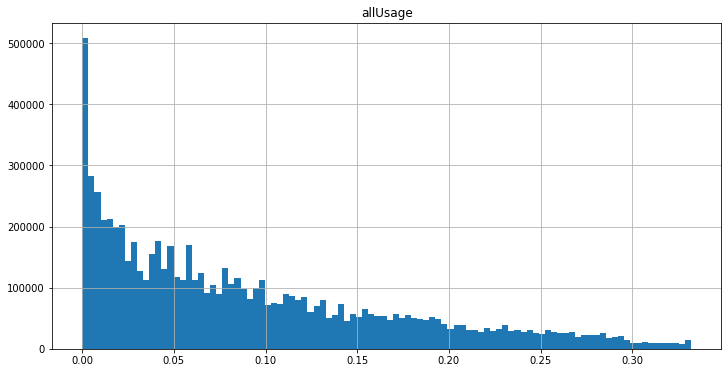

In [24]:
dataset.hist(column='callinout', bins=100, figsize=(12,6))
dataset.hist(column='smsinout', bins=100, figsize=(12,6))
dataset.hist(column='internet', bins=100, figsize=(12,6))
dataset.hist(column='allUsage', bins=100, figsize=(12,6))

Text(0.5, 0, 'Attributes')

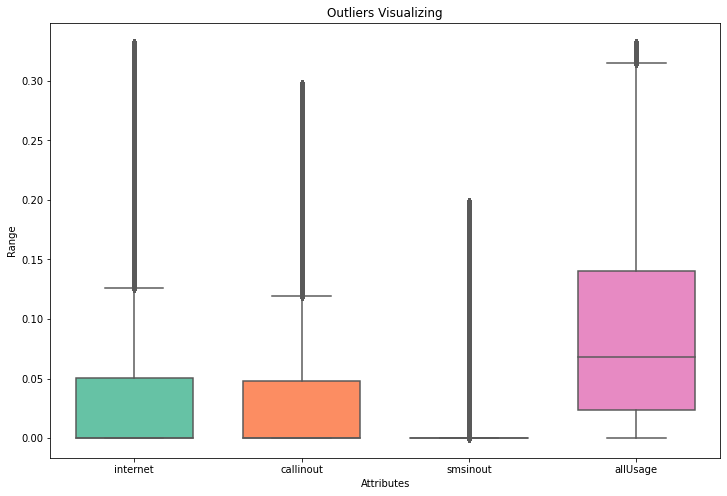

In [25]:
attributes = ['internet', 'callinout', 'smsinout', 'allUsage']
plt.rcParams['figure.figsize'] = [12, 8]
sns.boxplot(data = dataset[attributes], orient='v', palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Visualizing")
plt.ylabel("Range")
plt.xlabel("Attributes")

## **2.4. Finding most active Hours & most active Days**

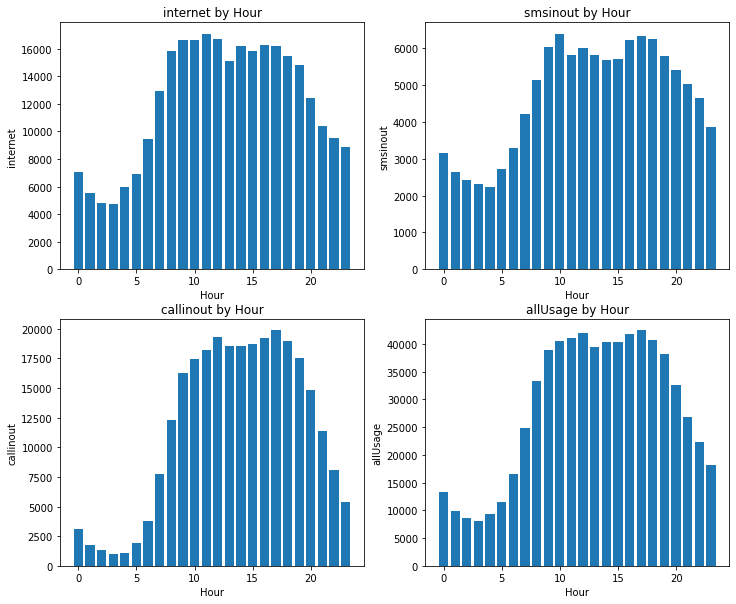

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
service = dataset['internet'].groupby(dataset['hour']).sum()
service = service.to_frame()
ax[0][0].set_xlabel('Hour')
ax[0][0].set_ylabel('internet')
ax[0][0].set_title('internet by Hour')
ax[0][0].bar(service.index.values, service['internet'])

service = dataset['smsinout'].groupby(dataset['hour']).sum()
service = service.to_frame()
ax[0][1].set_xlabel('Hour')
ax[0][1].set_ylabel('smsinout')
ax[0][1].set_title('smsinout by Hour')
ax[0][1].bar(service.index.values, service['smsinout'])

service = dataset['callinout'].groupby(dataset['hour']).sum()
service = service.to_frame()
ax[1][0].set_xlabel('Hour')
ax[1][0].set_ylabel('callinout')
ax[1][0].set_title('callinout by Hour')
ax[1][0].bar(service.index.values, service['callinout'])

service = dataset['allUsage'].groupby(dataset['hour']).sum()
service = service.to_frame()
ax[1][1].set_xlabel('Hour')
ax[1][1].set_ylabel('allUsage')
ax[1][1].set_title('allUsage by Hour')
ax[1][1].bar(service.index.values, service['allUsage'])


plt.show()

**So, we can see the following results:**

- Active hours: [9:00, 19:00]
- less Active hours: [20:00, 8:00]


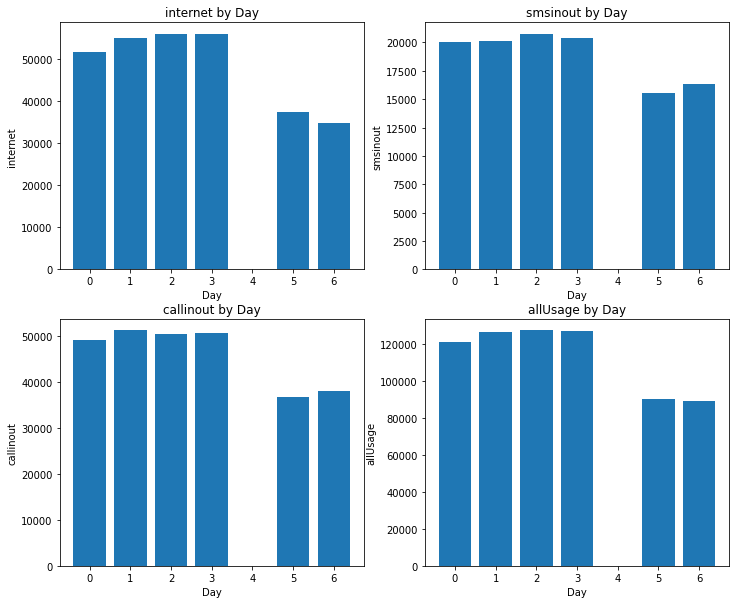

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))
service = dataset['internet'].groupby(dataset['day']).sum()
service = service.to_frame()
ax[0][0].set_xlabel('Day')
ax[0][0].set_ylabel('internet')
ax[0][0].set_title('internet by Day')
ax[0][0].bar(service.index.values, service['internet'])

service = dataset['smsinout'].groupby(dataset['day']).sum()
service = service.to_frame()
ax[0][1].set_xlabel('Day')
ax[0][1].set_ylabel('smsinout')
ax[0][1].set_title('smsinout by Day')
ax[0][1].bar(service.index.values, service['smsinout'])

service = dataset['callinout'].groupby(dataset['day']).sum()
service = service.to_frame()
ax[1][0].set_xlabel('Day')
ax[1][0].set_ylabel('callinout')
ax[1][0].set_title('callinout by Day')
ax[1][0].bar(service.index.values, service['callinout'])

service = dataset['allUsage'].groupby(dataset['day']).sum()
service = service.to_frame()
ax[1][1].set_xlabel('Day')
ax[1][1].set_ylabel('allUsage')
ax[1][1].set_title('allUsage by Day')
ax[1][1].bar(service.index.values, service['allUsage'])


plt.show()

**So, we can see the following results:**

- **Active days**: Monday, Tuesday, Wednesday, Thursday
- **less Active days**: Saturday, Sunday

# **3. Data Clustering**
We will cluster the data acourding to the **CELL ID** and then acourding to the **COUNTRY CODE**, in two cases:
- Active Hours
- Active Days

## **3.1. Defining Helper Methods:**

In [28]:
def draw_elbows(df):
  labels = ['internet', 'smsinout', 'callinout', 'allUsage']
  for column in range(0, 3): #going over all the four featuers 
    wcss = []
    one_attribute = df.iloc[:,[3,column]].values
    for number_of_clusters in range(1, 12):
        kmeans = KMeans(n_clusters = number_of_clusters, max_iter=50)
        kmeans.fit(one_attribute)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 12), wcss, linewidth = 2, color = "red", marker = "8")
    plt.title('The Elbow Method - {}'.format(labels[column]))
    plt.xlabel('Number of clusters')
    plt.ylabel('Within Cluster Sum of Squares')
    plt.show()

In [29]:
def draw_clusters(df, attr, num_of_clusters):
  labels = ['internet', 'smsinout', 'callinout', 'allUsage']
  one_attribute = df.iloc[:,[3,attr]].values
  kmeans = KMeans(n_clusters = num_of_clusters, max_iter = 2000, random_state=42)
  y_kmeans = kmeans.fit_predict(one_attribute)

  plt.figure(figsize=(10, 5), dpi=80)
  plt.scatter(one_attribute[:, 0], one_attribute[:, 1], c=y_kmeans, s=50, cmap='plasma')
  
  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='red')
  plt.title('Clusters of service by {}'.format(labels[attr]))
  plt.xlabel('Total Usage')

In [30]:
def remove_outliers(df):
  for i in range(0,4):
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df.loc[(df[i] >= Q1 - 1.5 * IQR) & (df[i] <= Q3 + 1.5 * IQR)]
  return df

In [31]:
def calc_silhouette(df):
  for number_of_clusters in range(2, 12):
    kmeans = KMeans(n_clusters = number_of_clusters, max_iter=50)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(number_of_clusters, silhouette_avg))

## **3.2. CellID * Active hours**


**Selecting the data only in active hours:**

In [32]:
dataset_active_hours = dataset.loc[(dataset['hour'] >= 9) & (dataset['hour'] <= 19)]
#dataset_active_hours.head()
#dataset_active_hours.shape

**Data grouping by CELL ID:**

In [33]:
dataset_active_hours_cellid = dataset_active_hours[['internet', 'smsinout', 'callinout', 'allUsage']].groupby(dataset_active_hours['CellID']).sum()
dataset_active_hours_cellid.reset_index(inplace = True)
#dataset_active_hours_cellid.head()

**Data Scaling so all the attributes are in the same range of values, which will help the clustering operations.**

In [34]:
dataset_active_hours_cellid_scaled = dataset_active_hours_cellid.drop(labels='CellID', axis=1)

scaler = StandardScaler()

dataset_active_hours_cellid_scaled = scaler.fit_transform(dataset_active_hours_cellid_scaled)
dataset_active_hours_cellid_scaled = pd.DataFrame(dataset_active_hours_cellid_scaled)

**The Elbow method for finding the best number of clusters for each attribute:**

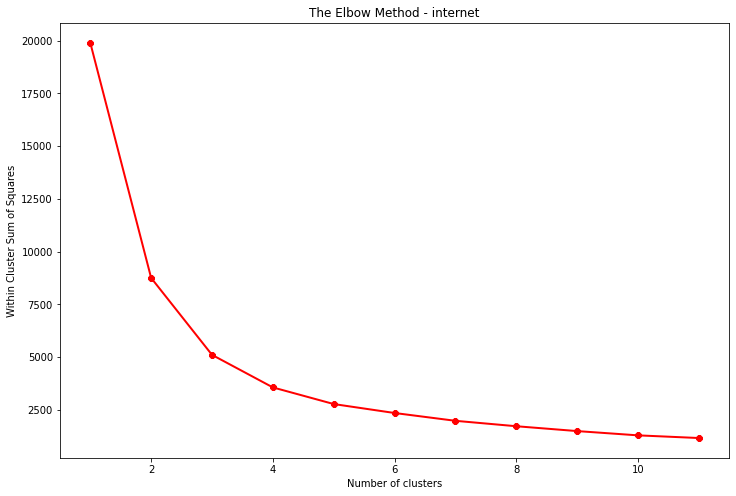

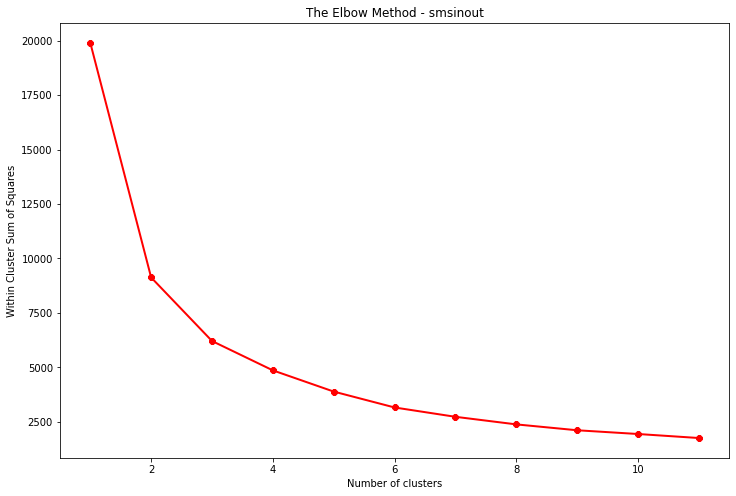

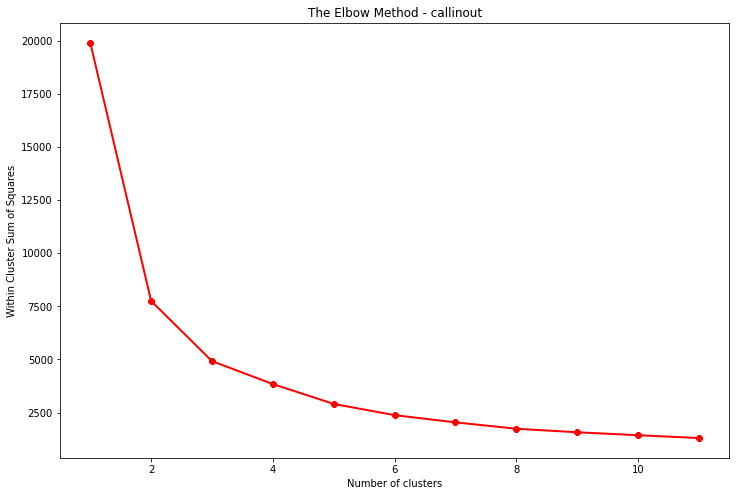

In [35]:
draw_elbows(dataset_active_hours_cellid_scaled)

**After grouping the data, acourding to CellID, only in the active hours, we can see that the most suiltable number of clusters for each is attribute:**

- SmsInOut: 4 clusters.
- CallInOut, Internet: 5 Clusters.

if we use these numbers for clustering, then we will be sure that the data is Normally distributed.

In [36]:
calc_silhouette(dataset_active_hours_cellid_scaled)

For n_clusters=2, the silhouette score is 0.40720590881814195
For n_clusters=3, the silhouette score is 0.3549734912651287
For n_clusters=4, the silhouette score is 0.35771299274065554
For n_clusters=5, the silhouette score is 0.34174202320955094
For n_clusters=6, the silhouette score is 0.3085769544803132
For n_clusters=7, the silhouette score is 0.3160845345513218
For n_clusters=8, the silhouette score is 0.321956788940399
For n_clusters=9, the silhouette score is 0.31495375805297116
For n_clusters=10, the silhouette score is 0.3132916128531925
For n_clusters=11, the silhouette score is 0.2956528580405704


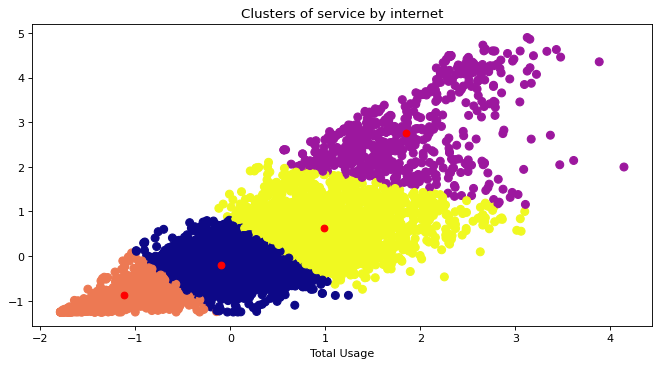

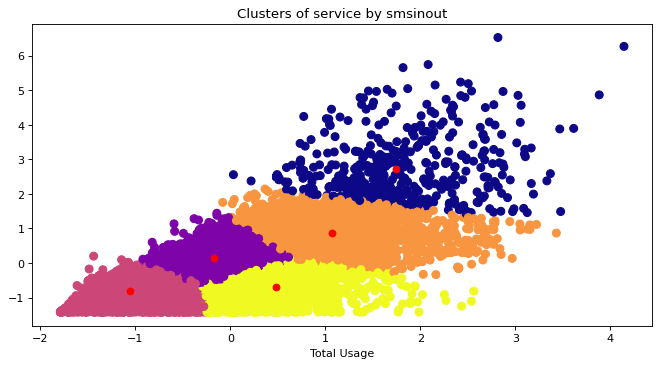

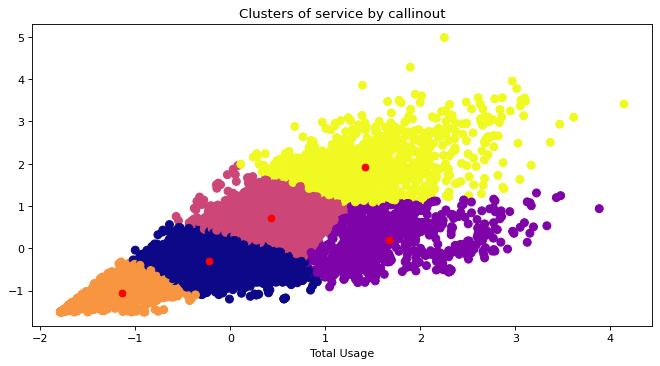

In [37]:
draw_clusters(dataset_active_hours_cellid_scaled, 0, 4)
draw_clusters(dataset_active_hours_cellid_scaled, 1, 5)
draw_clusters(dataset_active_hours_cellid_scaled, 2, 5)

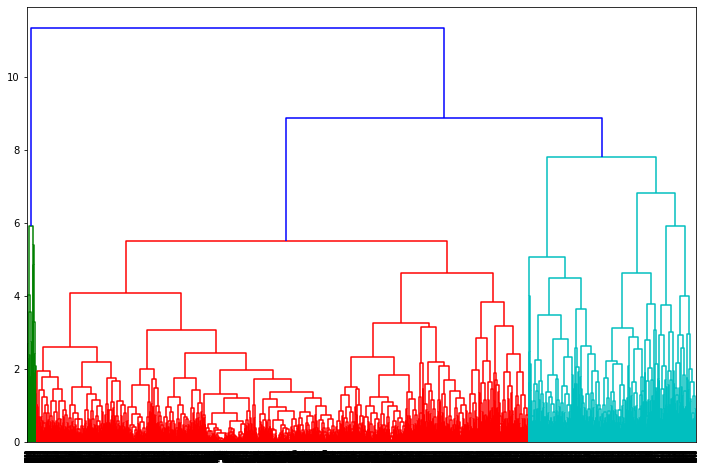

In [38]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram, cut_tree

mergings = linkage(dataset_active_hours_cellid_scaled, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [39]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
dataset_active_hours_cellid_scaled['Cluster_Id'] = cluster_labels
dataset_active_hours_cellid_scaled.head()
dataset_active_hours_cellid_scaled.describe()

,0,1,2,3,Cluster_Id
count,9.953000e+03,9.953000e+03,9.953000e+03,9.953000e+03,9953.000000
mean,3.736922e-16,3.338930e-16,3.550639e-16,-3.373224e-16,0.403195
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.739135
min,-1.253494e+00,-1.419772e+00,-1.508986e+00,-1.790877e+00,0.000000
25%,-6.847849e-01,-7.143642e-01,-8.075837e-01,-7.454965e-01,0.000000
50%,-1.851603e-01,-1.747786e-01,-1.529179e-01,-8.208632e-02,0.000000
75%,3.690094e-01,5.076272e-01,6.572461e-01,6.267593e-01,1.000000
max,4.896974e+00,6.521687e+00,4.982349e+00,4.145247e+00,3.000000


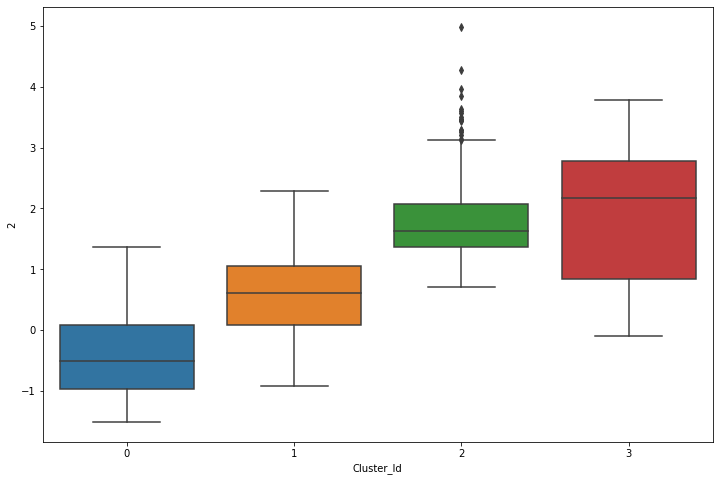

In [41]:
sns.boxplot(x='Cluster_Id', y=2, data=dataset_active_hours_cellid_scaled)

## **3.3. CellID * Less Active hours**


**Selecting the data only in Less active hours:**

In [42]:
dataset_less_active_hours = dataset.loc[~(dataset['hour'] >= 9) | ~(dataset['hour'] <= 19)]
#dataset_less_active_hours.head()
#dataset_less_active_hours.shape

**Data grouping by CELL ID:**

In [43]:
dataset_less_active_hours_cellid = dataset_less_active_hours[['internet', 'smsinout', 'callinout', 'allUsage']].groupby(dataset_less_active_hours['CellID']).sum()
dataset_less_active_hours_cellid.reset_index(inplace = True)
#dataset_less_active_hours_cellid.head()

**Data Scaling so all the attributes are in the same range of values, which will help the clustering operations.**

In [44]:
dataset_less_active_hours_cellid_scaled = dataset_less_active_hours_cellid.drop(labels='CellID', axis=1)

scaler = StandardScaler()

dataset_less_active_hours_cellid_scaled = scaler.fit_transform(dataset_less_active_hours_cellid_scaled)
dataset_less_active_hours_cellid_scaled = pd.DataFrame(dataset_less_active_hours_cellid_scaled)

**The Elbow method for finding the best number of clusters for each attribute:**

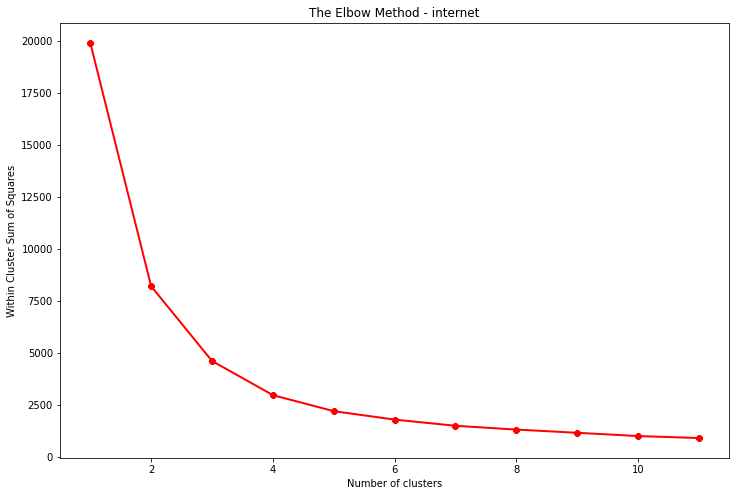

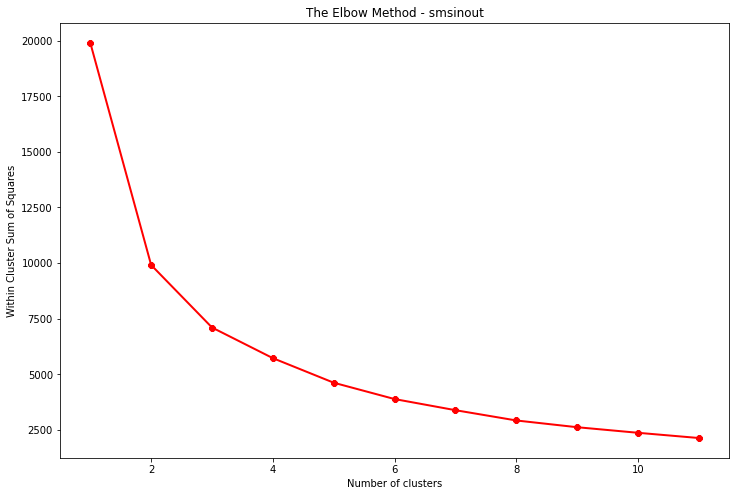

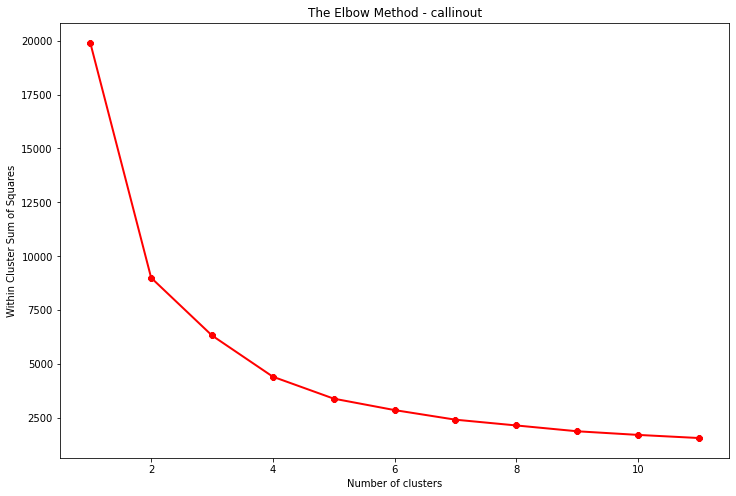

In [45]:
draw_elbows(dataset_less_active_hours_cellid_scaled)

**After grouping the data, acourding to CellID, only in the *NON* active hours, we can see that the most suiltable number of clusters for each is attribute:**

- AllUsage, Internet: 4 clusters.
- CallInOut : 5 Clusters.
- SmsInOut : 6 Clusters

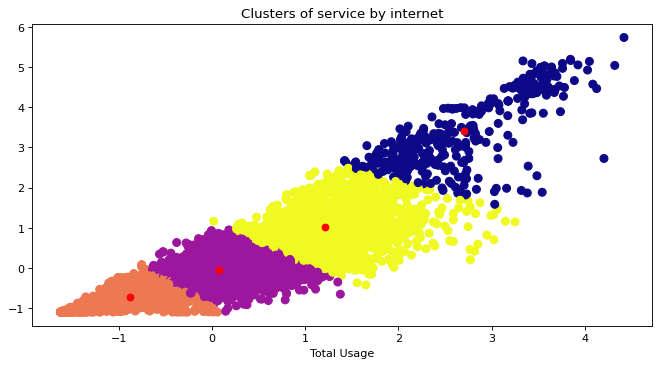

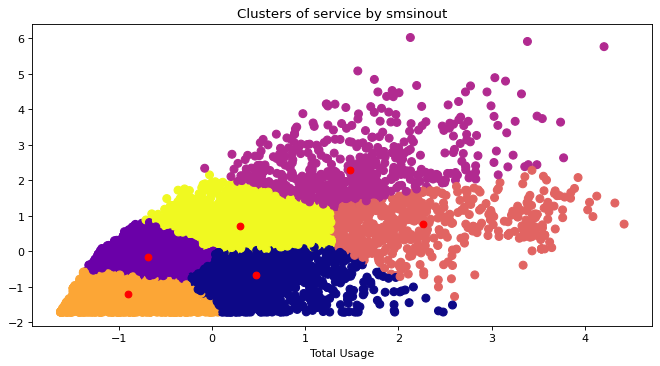

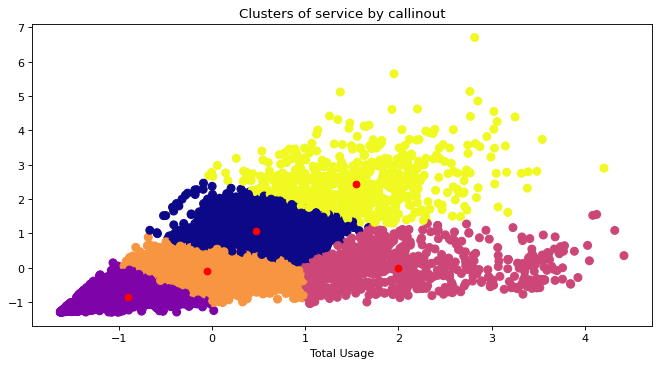

In [46]:
draw_clusters(dataset_less_active_hours_cellid_scaled, 0, 4)
draw_clusters(dataset_less_active_hours_cellid_scaled, 1, 6)
draw_clusters(dataset_less_active_hours_cellid_scaled, 2, 5)

## **3.4. CellID * Active Days**


**Selecting the data only in active Days:**

In [47]:
dataset_active_days = dataset.loc[(dataset['day'] >= 0) & (dataset['day'] <= 3)]
#dataset_active_days.head()
#dataset_active_days.shape

**Data grouping by CELL ID:**

In [48]:
dataset_active_days_cellid = dataset_active_days[['internet', 'smsinout', 'callinout', 'allUsage']].groupby(dataset_active_days['CellID']).sum()
dataset_active_days_cellid.reset_index(inplace = True)
#dataset_active_days_cellid.head()

**Data Scaling so all the attributes are in the same range of values, which will help the clustering operations.**

In [49]:
dataset_active_days_cellid_scaled = dataset_active_days_cellid.drop(labels='CellID', axis=1)

scaler = StandardScaler()

dataset_active_days_cellid_scaled = scaler.fit_transform(dataset_active_days_cellid_scaled)
dataset_active_days_cellid_scaled = pd.DataFrame(dataset_active_days_cellid_scaled)

**The Elbow method for finding the best number of clusters for each attribute:**

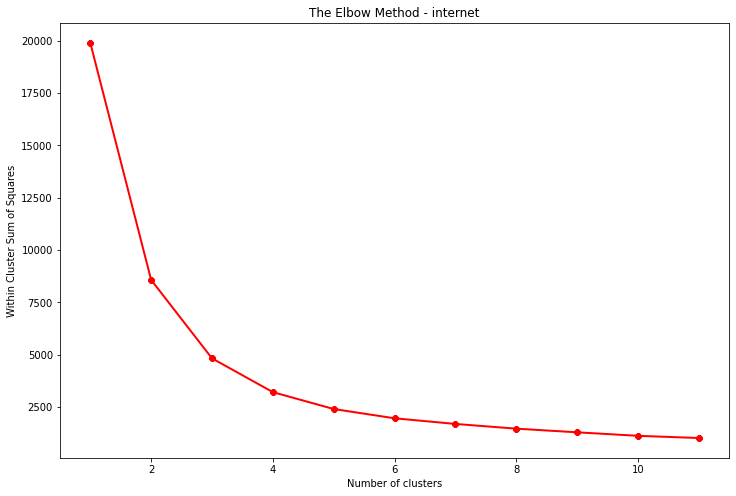

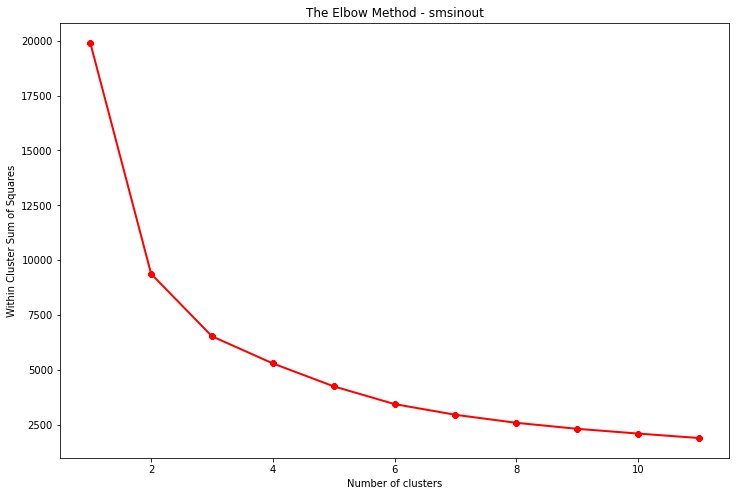

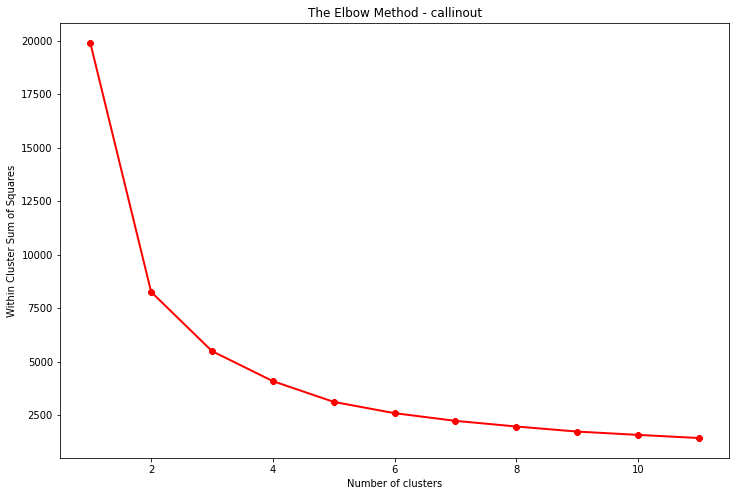

In [50]:
draw_elbows(dataset_active_days_cellid_scaled)

**After grouping the data, acourding to CellID, only in the active Days, we can see that the most suiltable number of clusters for each is attribute:**

- Internet: 4 clusters.
- CallInOut : 5 Clusters.
- SmsInOut : 6 Clusters

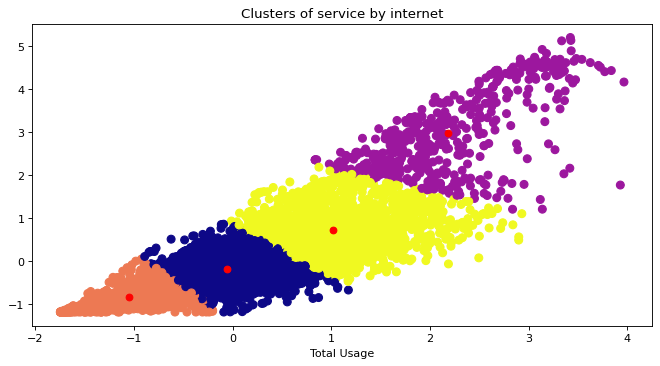

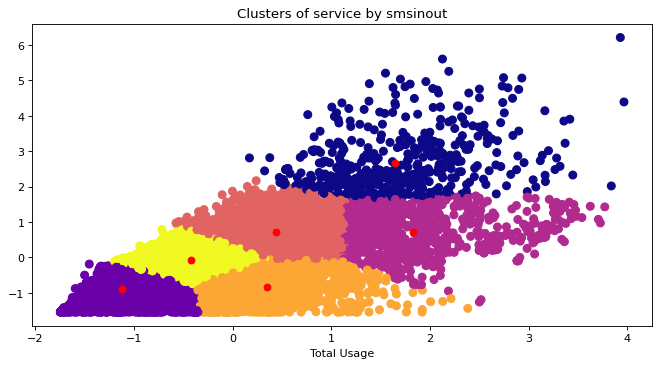

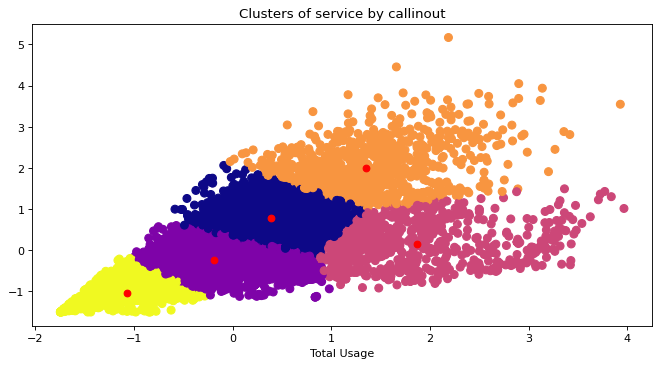

In [51]:
draw_clusters(dataset_active_days_cellid_scaled, 0, 4)
draw_clusters(dataset_active_days_cellid_scaled, 1, 6)
draw_clusters(dataset_active_days_cellid_scaled, 2, 5)

## **3.5. Country Code * Active hours**


**Selecting the data only in active hours:**

In [52]:
dataset_active_hours = dataset.loc[(dataset['hour'] >= 9) & (dataset['hour'] <= 19)]
#dataset_active_hours.head()
#dataset_active_hours.shape

**Data grouping by Country Code:**

In [53]:
dataset_active_hours_countrycode = dataset_active_hours[['internet', 'smsinout', 'callinout', 'allUsage']].groupby(dataset_active_hours['countrycode']).sum()
dataset_active_hours_countrycode.reset_index(inplace = True)
#dataset_active_hours_countrycode.head()
dataset_active_hours_countrycode.shape

(301, 5)

**Data Scaling so all the attributes are in the same range of values, which will help the clustering operations.**

In [54]:
dataset_active_hours_countrycode_scaled = dataset_active_hours_countrycode.drop(labels='countrycode', axis=1)

scaler = StandardScaler()

dataset_active_hours_countrycode_scaled = scaler.fit_transform(dataset_active_hours_countrycode_scaled)
dataset_active_hours_countrycode_scaled = pd.DataFrame(dataset_active_hours_countrycode_scaled)

**The Elbow method for finding the best number of clusters for each attribute:**

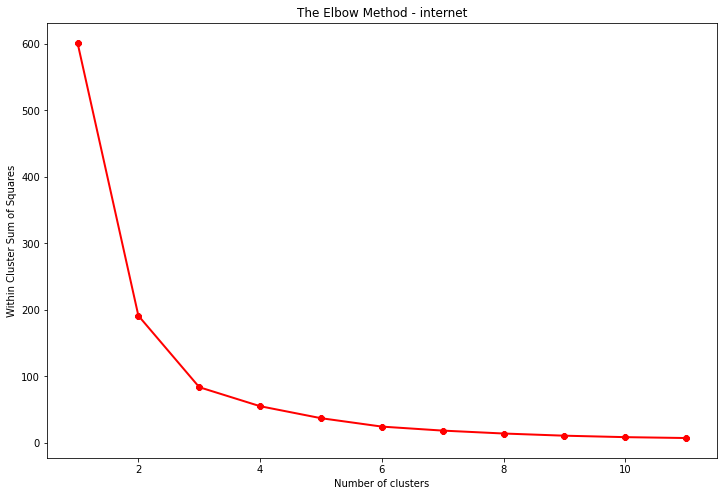

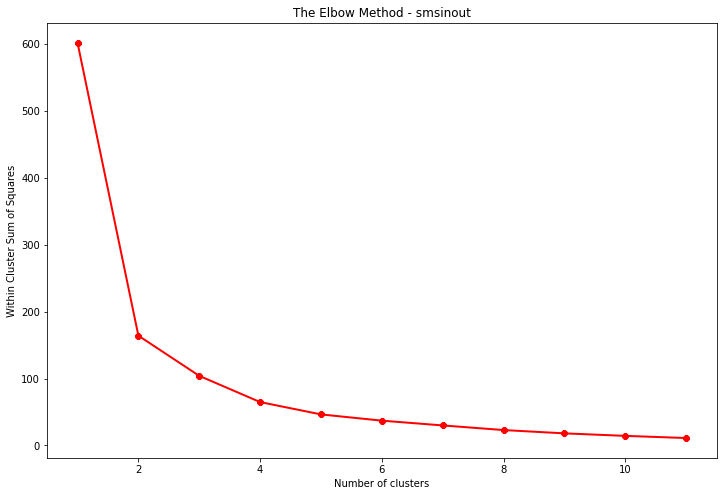

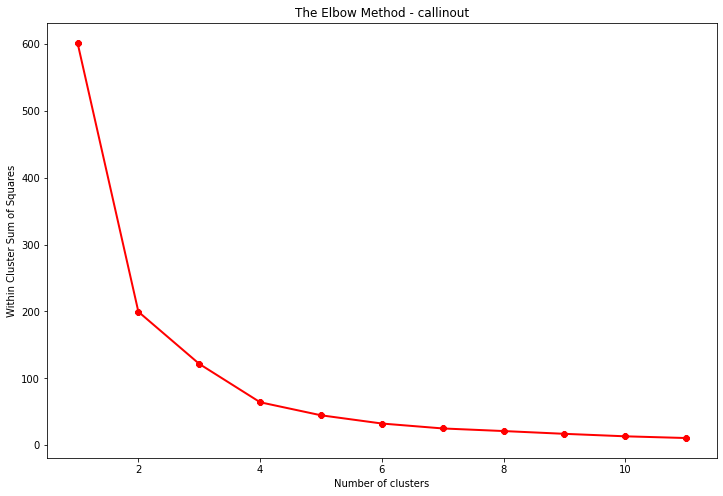

In [55]:
draw_elbows(dataset_active_hours_countrycode_scaled)

**After grouping the data, acourding to Country code, only in the active hours, we can see that the most suiltable number of clusters for all attribute is:**

- SmsInOut, CallInOut, Internet: 4 clusters.

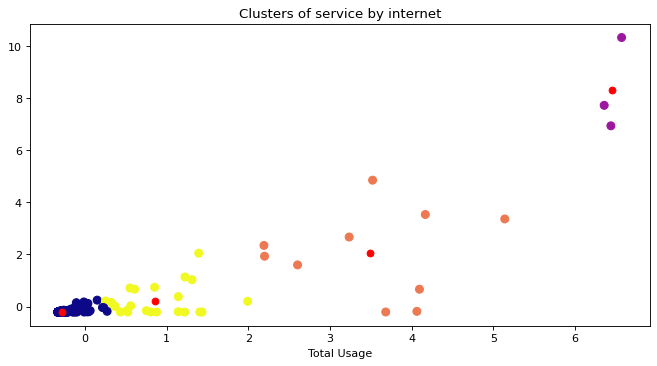

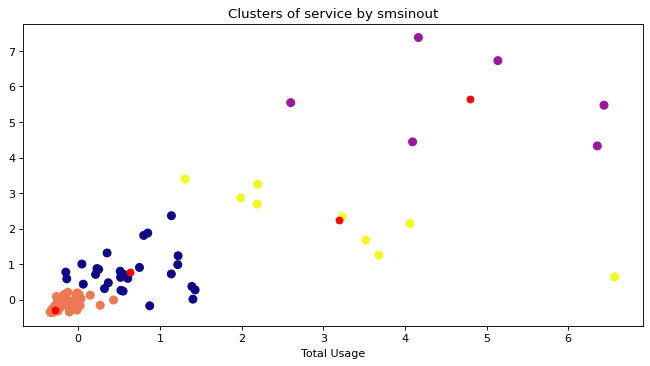

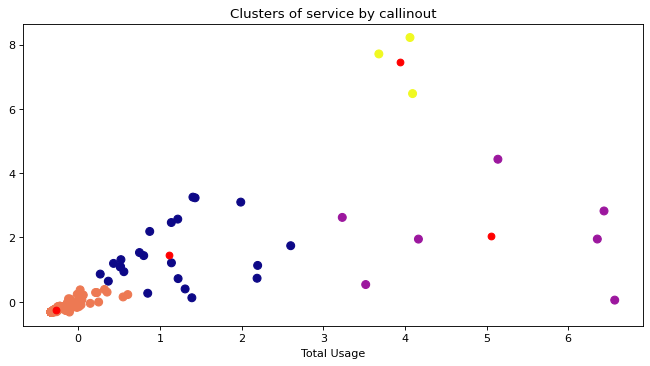

In [56]:
draw_clusters(dataset_active_hours_countrycode_scaled, 0, 4)
draw_clusters(dataset_active_hours_countrycode_scaled, 1, 4)
draw_clusters(dataset_active_hours_countrycode_scaled, 2, 4)

**We can see that there are some countries might be outliers, so lets remove them and see the results**

In [57]:
dataset_active_hours_countrycode_scaled = remove_outliers(dataset_active_hours_countrycode_scaled)

**Before we re-draw the clusters we have to check the number of clusters again, and we do that by the cell above.**

**After that, Lets cluster the data again after removing the outlierd countries:**

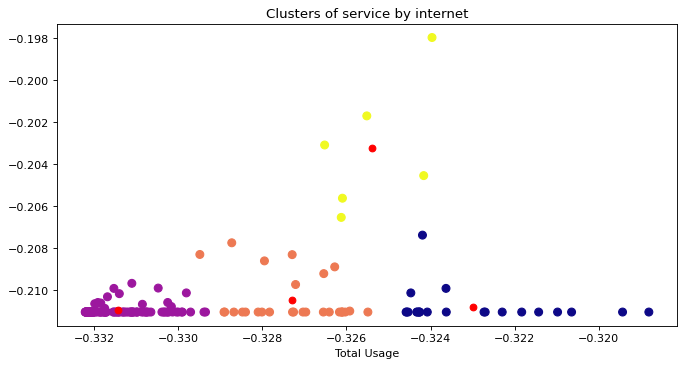

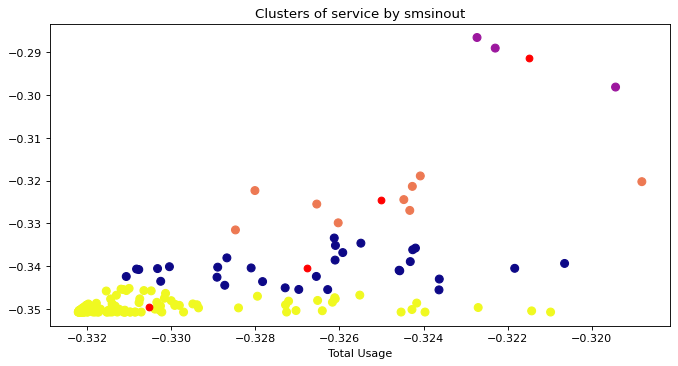

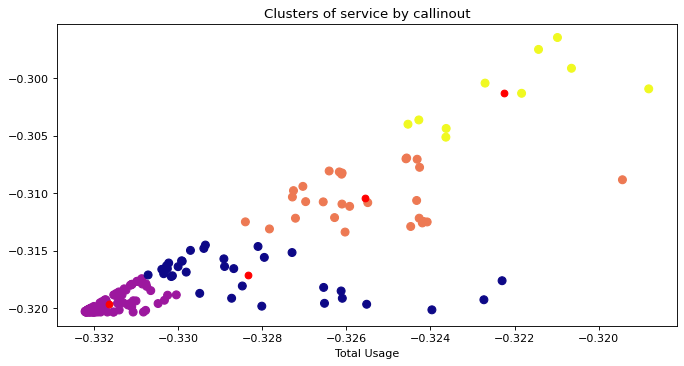

In [58]:
draw_clusters(dataset_active_hours_countrycode_scaled, 0, 4)
draw_clusters(dataset_active_hours_countrycode_scaled, 1, 4)
draw_clusters(dataset_active_hours_countrycode_scaled, 2, 4)

## **3.6. Country Code * Less Active hours**


**Selecting the data only in Less active hours:**

In [59]:
dataset_less_active_hours = dataset.loc[~(dataset['hour'] >= 9) | ~(dataset['hour'] <= 19)]
#dataset_less_active_hours.head()
#dataset_less_active_hours.shape

**Data grouping by Country Code:**

In [60]:
dataset_less_active_hours_countrycode = dataset_less_active_hours[['internet', 'smsinout', 'callinout', 'allUsage']].groupby(dataset_less_active_hours['countrycode']).sum()
dataset_less_active_hours_countrycode.reset_index(inplace = True)
#dataset_less_active_hours_countrycode.head()

**Data Scaling so all the attributes are in the same range of values, which will help the clustering operations.**

In [61]:
dataset_less_active_hours_countrycode_scaled = dataset_less_active_hours_countrycode.drop(labels='countrycode', axis=1)

scaler = StandardScaler()

dataset_less_active_hours_countrycode_scaled = scaler.fit_transform(dataset_less_active_hours_countrycode_scaled)
dataset_less_active_hours_countrycode_scaled = pd.DataFrame(dataset_less_active_hours_countrycode_scaled)

**The Elbow method for finding the best number of clusters for each attribute:**

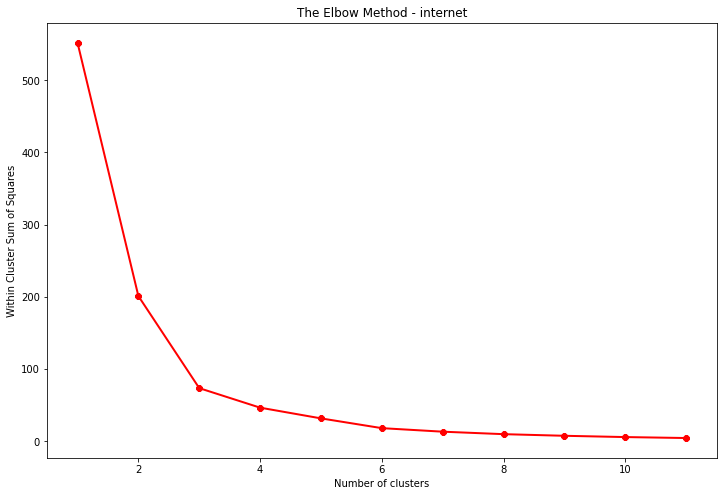

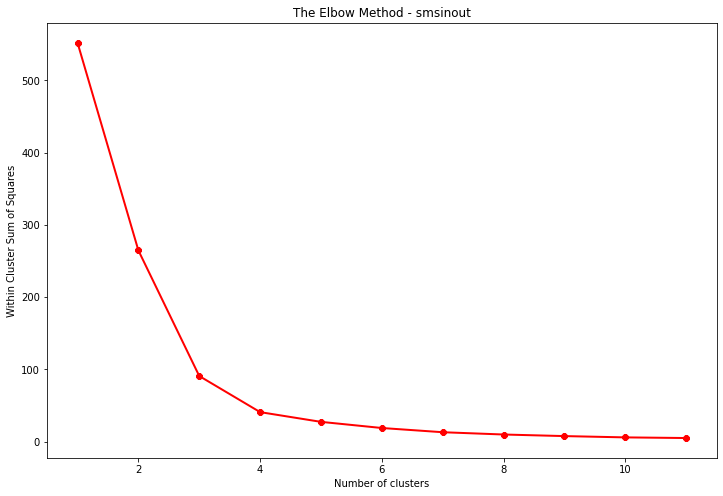

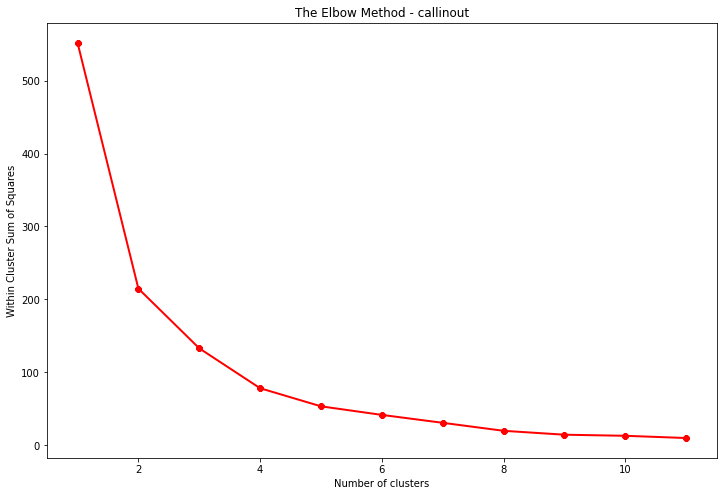

In [62]:
draw_elbows(dataset_less_active_hours_countrycode_scaled)

**After grouping the data, acourding to Country Code, only in the *NON* active hours, we can see that the most suiltable number of clusters for each is attribute:**

- Internet , SmsInOut: 4 clusters.
- CallInOut: 5 Clusters.

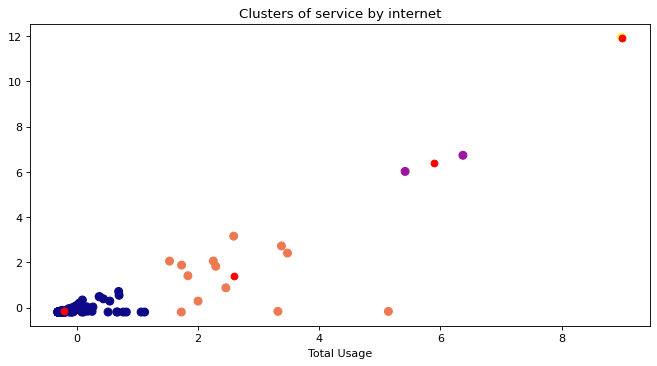

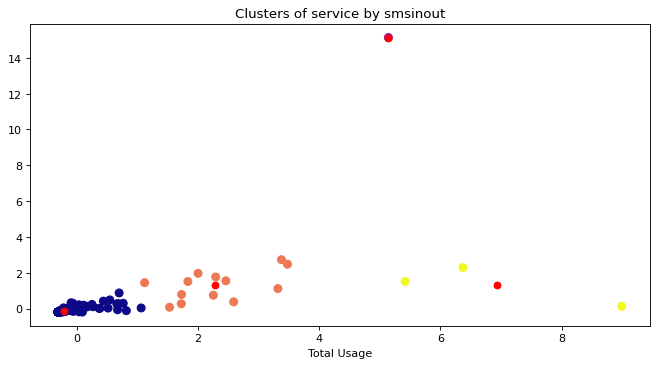

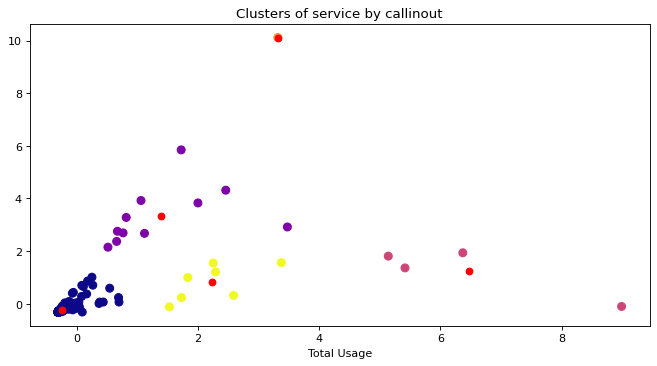

In [63]:
draw_clusters(dataset_less_active_hours_countrycode_scaled, 0, 4)
draw_clusters(dataset_less_active_hours_countrycode_scaled, 1, 4)
draw_clusters(dataset_less_active_hours_countrycode_scaled, 2, 5)

In [64]:
dataset_less_active_hours_countrycode_scaled = remove_outliers(dataset_less_active_hours_countrycode_scaled)

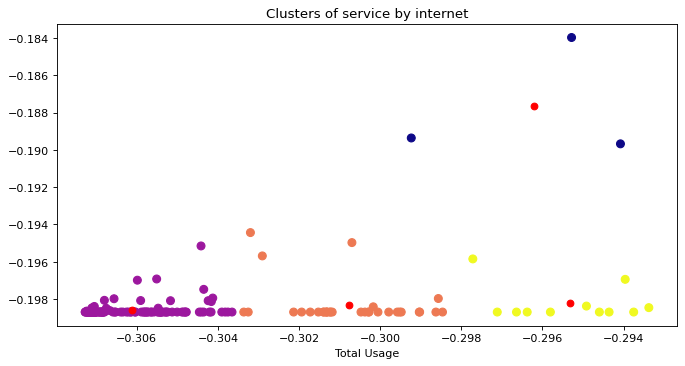

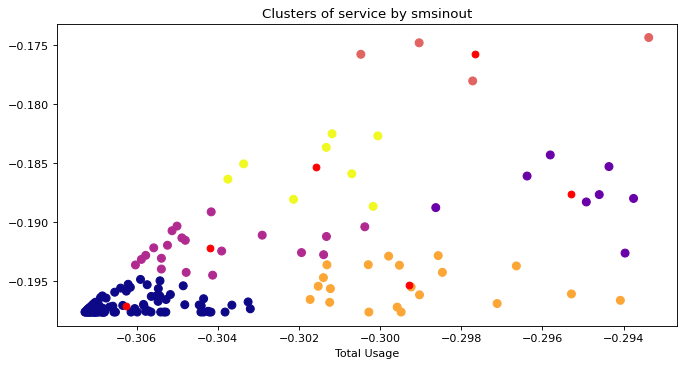

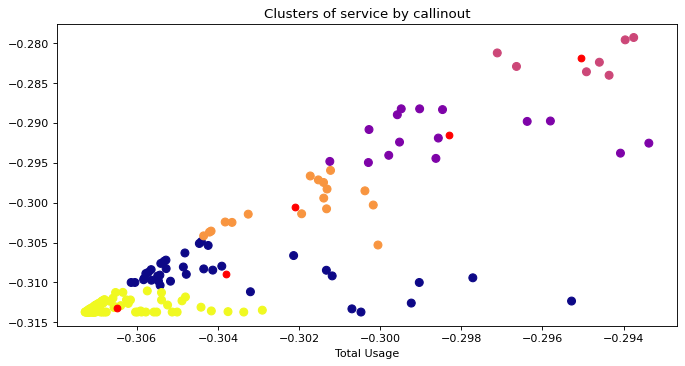

In [65]:
draw_clusters(dataset_less_active_hours_countrycode_scaled, 0, 4)
draw_clusters(dataset_less_active_hours_countrycode_scaled, 1, 6)
draw_clusters(dataset_less_active_hours_countrycode_scaled, 2, 5)

## **3.7. Country Code * Active Days**


**Selecting the data only in active Days:**

In [66]:
dataset_active_days = dataset.loc[(dataset['day'] >= 0) & (dataset['day'] <= 3)]
#dataset_active_days.head()
#dataset_active_days.shape

**Data grouping by Country Code:**

In [67]:
dataset_active_days_countrycode = dataset_active_days[['internet', 'smsinout', 'callinout', 'allUsage']].groupby(dataset_active_days['countrycode']).sum()
dataset_active_days_countrycode.reset_index(inplace = True)
#dataset_active_days_countrycode.head()

**Data Scaling so all the attributes are in the same range of values, which will help the clustering operations.**

In [68]:
dataset_active_days_countrycode_scaled = dataset_active_days_countrycode.drop(labels='countrycode', axis=1)

scaler = StandardScaler()

dataset_active_days_countrycode_scaled = scaler.fit_transform(dataset_active_days_countrycode_scaled)
dataset_active_days_countrycode_scaled = pd.DataFrame(dataset_active_days_countrycode_scaled)

**The Elbow method for finding the best number of clusters for each attribute:**

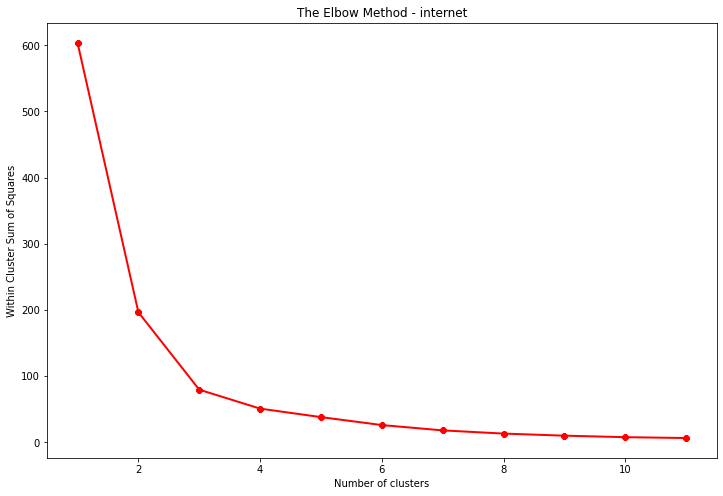

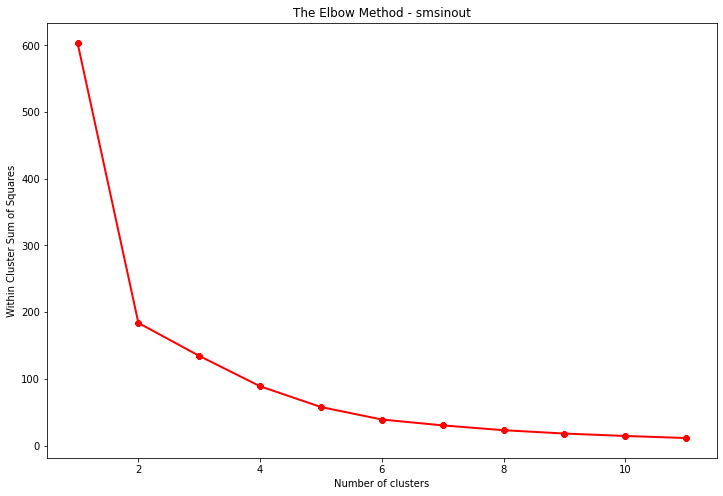

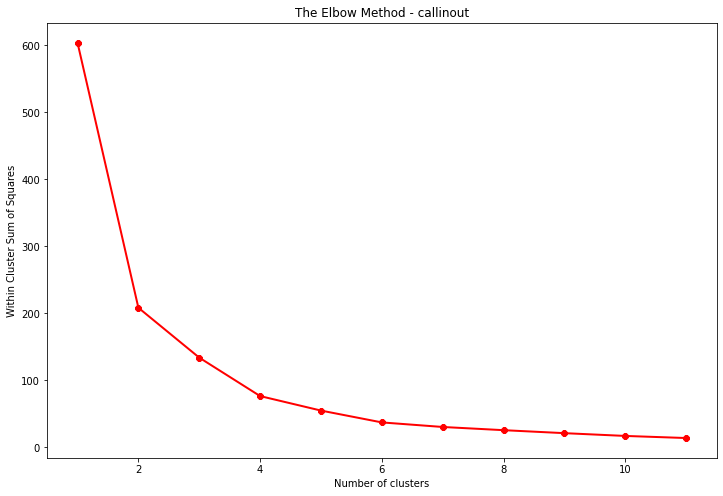

In [69]:
draw_elbows(dataset_active_days_countrycode_scaled)

**After grouping the data, acourding to Country code, only in the active Days, we can see that the most suiltable number of clusters for each attribute is:**

- Internet: 4 clusters.
- SmsInOut : 5 Clusters
- CallInOut : 4 Clusters.

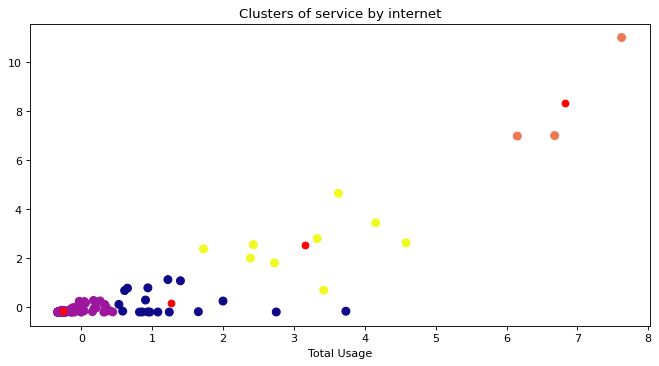

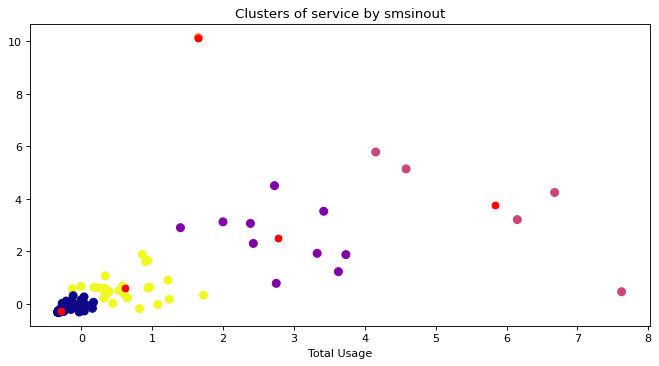

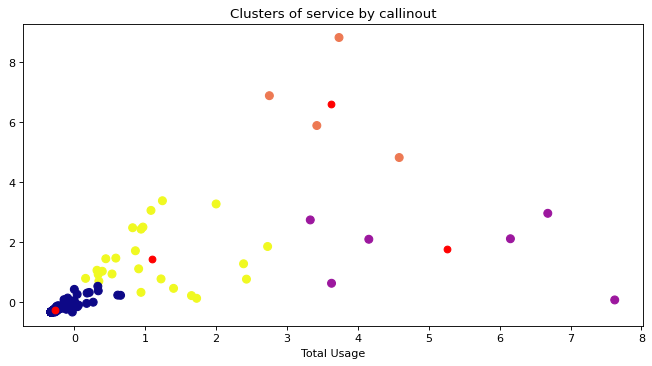

In [70]:
draw_clusters(dataset_active_days_countrycode_scaled, 0, 4)
draw_clusters(dataset_active_days_countrycode_scaled, 1, 5)
draw_clusters(dataset_active_days_countrycode_scaled, 2, 4)

In [71]:
dataset_active_days_countrycode_scaled = remove_outliers(dataset_active_days_countrycode_scaled)

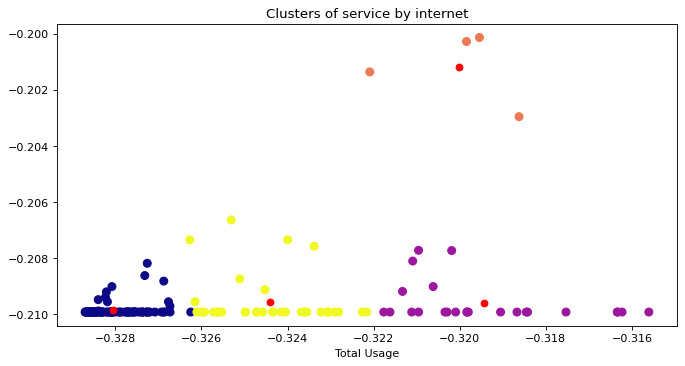

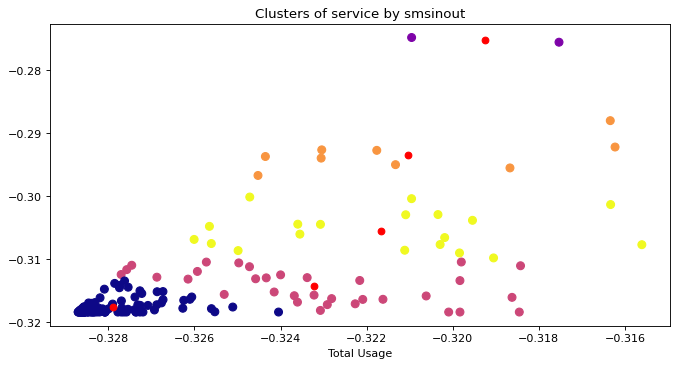

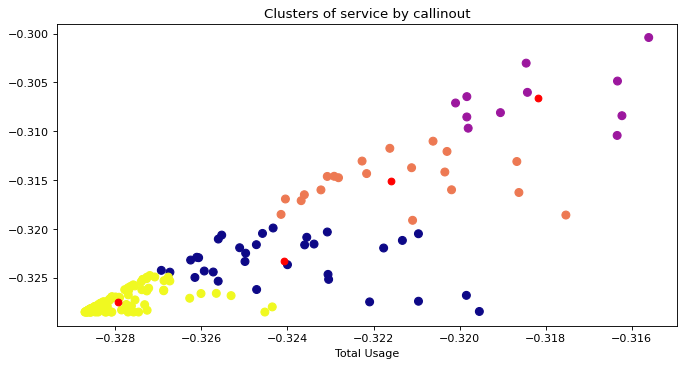

In [72]:
draw_clusters(dataset_active_days_countrycode_scaled, 0, 4)
draw_clusters(dataset_active_days_countrycode_scaled, 1, 5)
draw_clusters(dataset_active_days_countrycode_scaled, 2, 4)

# **4. Events Detection**
**Now, we will try to detect the events acourding to the calls rate**

In [73]:
dataset_calls_by_day = dataset[['callin', 'callout', 'callinout']].groupby(dataset['day']).sum()
dataset_calls_by_day.reset_index(inplace=True)
dataset_calls_by_day.head()

,day,callin,callout,callinout
0,0,16371.5411,32829.2262,49200.7673
1,1,17068.4132,34097.8545,51166.2677
2,2,17251.1975,33149.2662,50400.4637
3,3,17121.7650,33437.0385,50558.8035
4,5,9495.8301,27302.6383,36798.4684


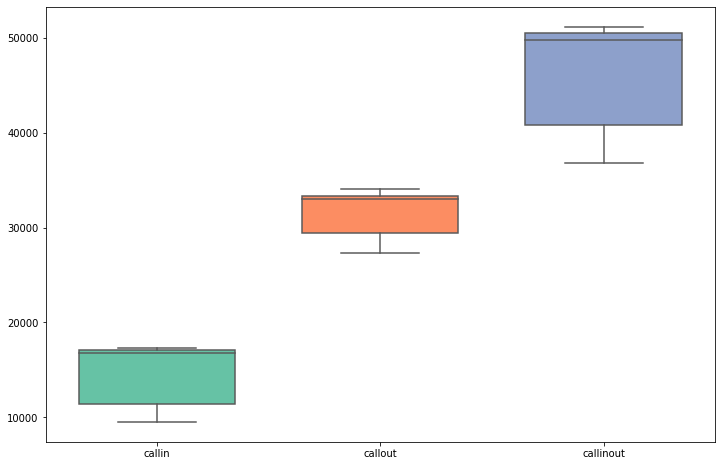

In [74]:
sns.boxplot(data = dataset_calls_by_day[['callin', 'callout', 'callinout']], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)

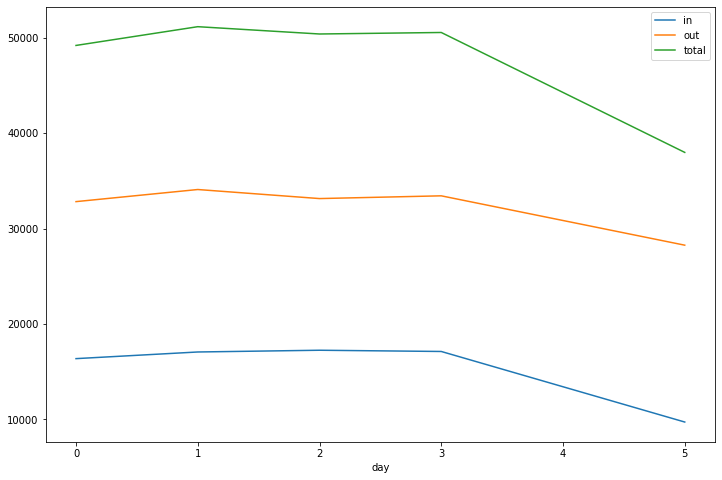

In [75]:
df = pd.DataFrame({'in': dataset_calls_by_day['callin'],
                   'out': dataset_calls_by_day['callout'],
                   'total': dataset_calls_by_day['callinout'] }, 
                    index = dataset_calls_by_day['day'] )
lines = df.plot.line()

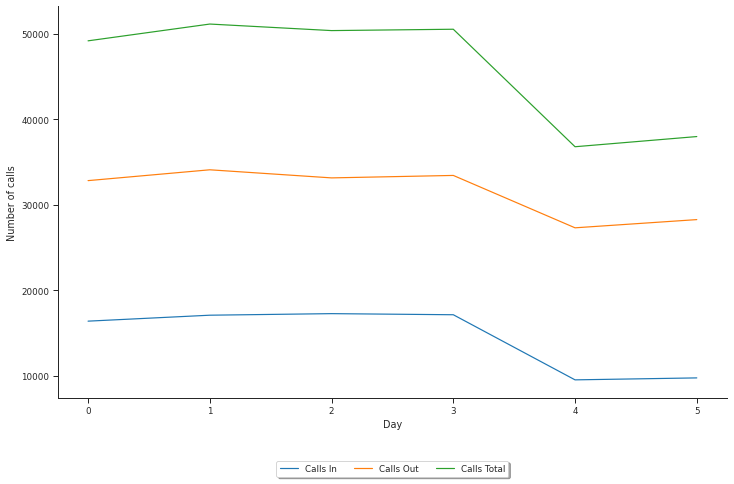

In [76]:
sns.set_style("ticks")
sns.set_context("paper")
f = plt.figure()
ax = dataset_calls_by_day['callin'].plot(label='Calls In')
dataset_calls_by_day['callout'].plot(ax = ax, label='Calls Out')
dataset_calls_by_day['callinout'].plot(ax = ax, label='Calls Total')
plt.xlabel("Day")
plt.ylabel("Number of calls")
sns.despine()

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

plt.rcParams['figure.figsize'] = [10, 5]

In [77]:
dataset_calls_in_week_hours_one_country = dataset.loc[(dataset['countrycode'] == 0)]
dataset_calls_in_week_hours_one_country = dataset_calls_in_week_hours_one_country[['callin', 'callout', 'callinout', 'day', 'hour']].groupby(['day', 'hour'], as_index=False).sum()
dataset_calls_in_week_hours_one_country.head()

,day,hour,callin,callout,callinout
0,0,0,1.1329,23.4927,24.6256
1,0,1,2.4312,25.6977,28.1289
2,0,2,1.6698,27.5968,29.2666
3,0,3,0.4937,30.7082,31.2019
4,0,4,4.9735,23.5594,28.5329


In [78]:
dataset_calls_in_week_hours_one_country.describe()

,day,hour,callin,callout,callinout
count,144.000000,144.000000,144.000000,144.000000,144.000000
mean,2.833333,11.500000,0.696894,12.511807,13.208701
std,2.122144,6.946348,1.424620,16.235771,16.916322
min,0.000000,0.000000,0.000000,0.001100,0.001600
25%,1.000000,5.750000,0.002175,0.150800,0.214275
50%,2.500000,11.500000,0.035600,2.413000,2.466350
75%,5.000000,17.250000,0.494800,23.509375,24.882775
max,6.000000,23.000000,8.265900,57.887000,57.887000


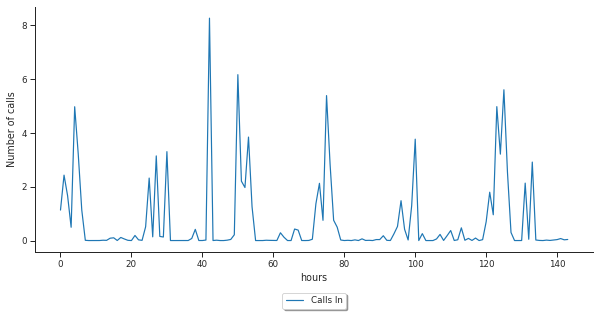

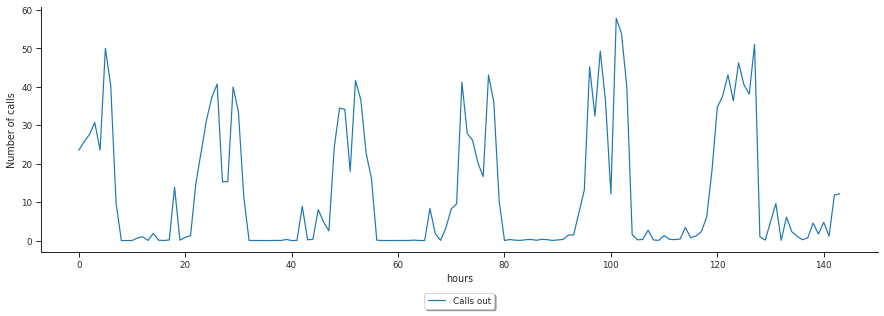

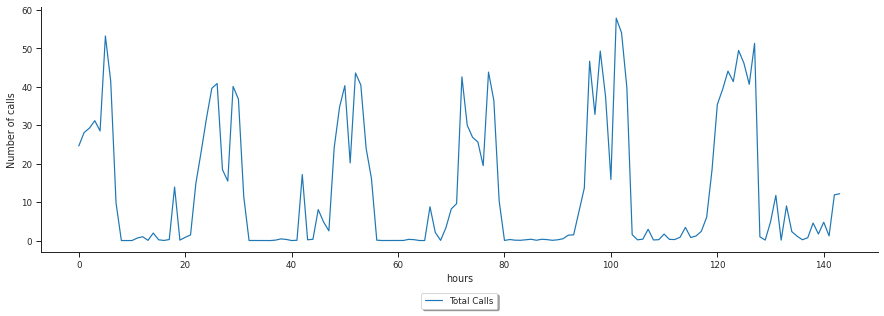

In [79]:
sns.set_style("ticks")
sns.set_context("paper")
f = plt.figure()
ax = dataset_calls_in_week_hours_one_country['callin'].plot(label='Calls In')
plt.xlabel("hours")
plt.ylabel("Number of calls")
sns.despine()
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.rcParams['figure.figsize'] = [15, 5]


sns.set_style("ticks")
sns.set_context("paper")
f = plt.figure()
ax = dataset_calls_in_week_hours_one_country['callout'].plot(label='Calls out')
plt.xlabel("hours")
plt.ylabel("Number of calls")
sns.despine()
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.rcParams['figure.figsize'] = [15, 5]


sns.set_style("ticks")
sns.set_context("paper")
f = plt.figure()
ax = dataset_calls_in_week_hours_one_country['callinout'].plot(label='Total Calls')
plt.xlabel("hours")
plt.ylabel("Number of calls")
sns.despine()
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
plt.rcParams['figure.figsize'] = [15, 5]